In [ ]:
# test
#test ruru
# test up

In [10]:
# test connect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# phase 1: Exploratory Data Analysis

In [3]:
# read data
# note to up and ruru : change path before run it
mushroom = pd.read_csv('/Users/yifanwang/Desktop/DSCI550/550project/mushrooms.csv')
# mushroom = pd.read_csv('/Users\Wenyu\Desktop\DSCI 550 Data Science at Scale\project/mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushroom.info()

From this quick overview, we can see:
1. There is no null value in the entire dataset.
2. All variables are categorical variable.
3. ......

In [ ]:
mushroom.describe()

In [ ]:
sns.countplot(data = mushroom, x = 'class')

The ratio of poisonous and edible mushroom is about 1:1

In [ ]:
# draw countplot to see the frequency of each cat variables.
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(mushroom.columns):
    if ix <= 3:
        if c != 'class':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = mushroom, x=c, ax = ax1)
    ix = ix +1
    if ix == 4:
        fig = plt.figure(figsize = (15,10))
        ix =1

# phase 2: machine learning models

## 2.1 Decision Tree

In [13]:
# split dataset in features and target variable
# features
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
            'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
            'stalk-surface-below-ring', 'stalk-color-above-ring',
            'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
            'ring-type', 'spore-print-color', 'population', 'habitat']
X = mushroom[features]
# target variable
y = mushroom['class']

In [14]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 2.1.1 Catboost

Use catboost package to do the decision tree model first.
The advantage of the package is it can deal with categorical variables easily.

In [15]:
import catboostca
cbc = catboost.CatBoostClassifier(random_seed=0, loss_function=None)
cbc.fit(X_train, y_train, cat_features = list(X_train.columns))

Learning rate set to 0.021639
0:	learn: 0.6362644	total: 79.5ms	remaining: 1m 19s
1:	learn: 0.5814129	total: 109ms	remaining: 54.5s
2:	learn: 0.5330156	total: 119ms	remaining: 39.7s
3:	learn: 0.4901635	total: 137ms	remaining: 34s
4:	learn: 0.4516339	total: 167ms	remaining: 33.3s
5:	learn: 0.4146539	total: 180ms	remaining: 29.8s
6:	learn: 0.3831535	total: 189ms	remaining: 26.8s
7:	learn: 0.3551525	total: 201ms	remaining: 24.9s
8:	learn: 0.3242526	total: 221ms	remaining: 24.3s
9:	learn: 0.3014048	total: 239ms	remaining: 23.6s
10:	learn: 0.2850261	total: 252ms	remaining: 22.6s
11:	learn: 0.2643300	total: 290ms	remaining: 23.9s
12:	learn: 0.2426909	total: 310ms	remaining: 23.5s
13:	learn: 0.2297347	total: 322ms	remaining: 22.6s
14:	learn: 0.2171413	total: 331ms	remaining: 21.7s
15:	learn: 0.1942192	total: 412ms	remaining: 25.3s
16:	learn: 0.1739172	total: 435ms	remaining: 25.1s
17:	learn: 0.1559210	total: 460ms	remaining: 25.1s
18:	learn: 0.1401947	total: 490ms	remaining: 25.3s
19:	learn: 

In [16]:
acc = accuracy_score(y_test, cbc.predict(X_test))
print(acc)

1.0


### 2.1.2 DecisionTreeClassifier()
##### transfrom categorical variables to numerical variables use sklearn.preprocessing.LabelEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
mushroom_encode = mushroom
for i in mushroom_encode.columns:
    mushroom_encode[i]=encoder.fit_transform(mushroom_encode[i])
mushroom_encode.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
X_encode = mushroom_encode[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                            'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                            'stalk-surface-below-ring', 'stalk-color-above-ring',
                            'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                            'ring-type', 'spore-print-color', 'population', 'habitat']]
y_encode = mushroom_encode['class']

use sklearn.preprocessing.StandardScaler
Standardize features by removing the mean and scaling to unit variance.

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_encode_sc=sc.fit_transform(X_encode)

In [8]:
# Split dataset into training set and test set
# 70% training and 30% test7
X_train_encode, X_test_encode, y_train_encode, y_test_encode = train_test_split(X_encode_sc, y_encode, test_size=0.3, random_state=2)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_encode,y_train_encode)

#Predict the response for test dataset
y_pred = clf.predict(X_test_encode)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_encode, y_pred))

### 2.2 Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_encode,y_train_encode)

In [ ]:
# Use confusion matrix for result analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred_nb_train=nb.predict(X_train_encode)
y_pred_nb_test=nb.predict(X_test_encode)
print(confusion_matrix(y_train_encode,y_pred_nb_train))
print(confusion_matrix(y_test_encode,y_pred_nb_test))

In [ ]:
# Use classification report to get general evaluation metrics
print(classification_report(y_train_encode,y_pred_nb_train))
print(classification_report(y_test_encode,y_pred_nb_test))

In [ ]:
# accuracy of using naive bayes classifier
print(accuracy_score(y_train_encode,y_pred_nb_train))
print(accuracy_score(y_test_encode,y_pred_nb_test))

### 2.3 SVC Classifier

In [ ]:
from sklearn.svm import SVC
svc_linear=SVC(kernel='linear')
svc_linear.fit(X_train_encode,y_train_encode)
svc_sigmoid=SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train_encode,y_train_encode)
svc_poly=SVC(kernel='poly')
svc_poly.fit(X_train_encode,y_train_encode)
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X_train_encode,y_train_encode)

In [ ]:
y_pred_sigmoid=svc_sigmoid.predict(X_test_encode)
y_pred_linear=svc_linear.predict(X_test_encode)
y_pred_poly=svc_poly.predict(X_test_encode)
y_pred_rbf=svc_rbf.predict(X_test_encode)

In [ ]:
print(confusion_matrix(y_test_encode,y_pred_sigmoid))
print(confusion_matrix(y_test_encode,y_pred_linear))
print(confusion_matrix(y_test_encode,y_pred_poly))
print(confusion_matrix(y_test_encode,y_pred_rbf))

In [ ]:
print(classification_report(y_test_encode,y_pred_sigmoid))
print(classification_report(y_test_encode,y_pred_linear))
print(classification_report(y_test_encode,y_pred_poly))
print(classification_report(y_test_encode,y_pred_rbf))

In [ ]:
print(round(accuracy_score(y_test_encode,y_pred_sigmoid),2))
print(round(accuracy_score(y_test_encode,y_pred_linear),2))
print(accuracy_score(y_test_encode,y_pred_poly))
print(accuracy_score(y_test_encode,y_pred_rbf))

### 2.4 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [ ]:
model_LR.fit(X_train_encode,y_train_encode)

In [ ]:
y_prob = model_LR.predict_proba(X_test_encode)[:,1] # This will give you positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test_encode, y_pred)

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test_encode,y_pred)
confusion_matrix

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_encode,y_pred)
auc_roc

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encode, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### 2.5 KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=5,weights = 'distance', metric='minkowski',p=2)
classifier.fit(X_train_encode,y_train_encode)
y_pred=classifier.predict(X_test_encode)
acc=accuracy_score(y_test_encode, y_pred)
print(acc)

1.0


## 2.1.3 Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_encode,y_train_encode)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
# Use confusion matrix for result analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred_nb_train=nb.predict(X_train_encode)
y_pred_nb_test=nb.predict(X_test_encode)
print(confusion_matrix(y_train_encode,y_pred_nb_train))
print(confusion_matrix(y_test_encode,y_pred_nb_test))

[[2704  206]
 [ 208 2568]]
[[1211   87]
 [ 101 1039]]


In [30]:
# Use classification report to get general evaluation metrics
print(classification_report(y_train_encode,y_pred_nb_train))
print(classification_report(y_test_encode,y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2910
           1       0.93      0.93      0.93      2776

    accuracy                           0.93      5686
   macro avg       0.93      0.93      0.93      5686
weighted avg       0.93      0.93      0.93      5686

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1298
           1       0.92      0.91      0.92      1140

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



In [31]:
# accuracy of using naive bayes classifier
print(accuracy_score(y_train_encode,y_pred_nb_train))
print(accuracy_score(y_test_encode,y_pred_nb_test))

0.9271895884628913
0.9228876127973749


## 2.1.4 SVC Classifier

In [32]:
from sklearn.svm import SVC
svc_linear=SVC(kernel='linear')
svc_linear.fit(X_train_encode,y_train_encode)
svc_sigmoid=SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train_encode,y_train_encode)
svc_poly=SVC(kernel='poly')
svc_poly.fit(X_train_encode,y_train_encode)
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X_train_encode,y_train_encode)

C:\Users\Wenyu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Wenyu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Wenyu\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred_sigmoid=svc_sigmoid.predict(X_test_encode)
y_pred_linear=svc_linear.predict(X_test_encode)
y_pred_poly=svc_poly.predict(X_test_encode)
y_pred_rbf=svc_rbf.predict(X_test_encode)

In [34]:
print(confusion_matrix(y_test_encode,y_pred_sigmoid))
print(confusion_matrix(y_test_encode,y_pred_linear))
print(confusion_matrix(y_test_encode,y_pred_poly))
print(confusion_matrix(y_test_encode,y_pred_rbf))

[[1093  205]
 [ 221  919]]
[[1268   30]
 [  25 1115]]
[[1298    0]
 [   0 1140]]
[[1298    0]
 [   0 1140]]


In [35]:
print(classification_report(y_test_encode,y_pred_sigmoid))
print(classification_report(y_test_encode,y_pred_linear))
print(classification_report(y_test_encode,y_pred_poly))
print(classification_report(y_test_encode,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1298
           1       0.82      0.81      0.81      1140

    accuracy                           0.83      2438
   macro avg       0.82      0.82      0.82      2438
weighted avg       0.83      0.83      0.83      2438

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1298
           1       0.97      0.98      0.98      1140

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

              preci

In [36]:
print(round(accuracy_score(y_test_encode,y_pred_sigmoid),2))
print(round(accuracy_score(y_test_encode,y_pred_linear),2))
print(accuracy_score(y_test_encode,y_pred_poly))
print(accuracy_score(y_test_encode,y_pred_rbf))

0.83
0.98
1.0
1.0


## 2.1.5 Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [51]:
model_LR.fit(X_train_encode,y_train_encode)

C:\Users\Wenyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_prob = model_LR.predict_proba(X_test_encode)[:,1] # This will give you positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test_encode, y_pred)

1.0

In [53]:
confusion_matrix=metrics.confusion_matrix(y_test_encode,y_pred)
confusion_matrix

array([[1249,   49],
       [  58, 1082]], dtype=int64)

In [54]:
auc_roc=metrics.roc_auc_score(y_test_encode,y_pred)
auc_roc

0.9556862109047658

In [55]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_encode, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9858094774687103

Text(0.5, 0, 'False Positive Rate')

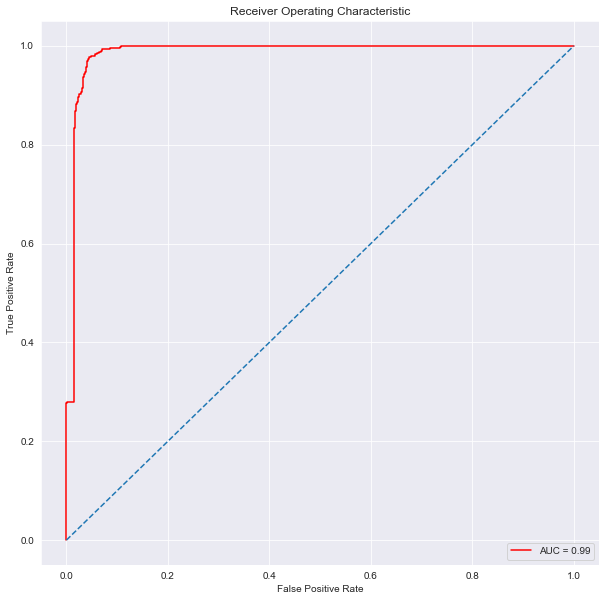

In [57]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')